In [5]:
import cv2
from PIL import Image
import os
from google.colab.patches import cv2_imshow

In [18]:
from google.colab import drive
import matplotlib.image as mpimg
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# path = '/content/drive/MyDrive/HW7/cat1.jpg'
image = '/content/drive/MyDrive/separado78.jpg'

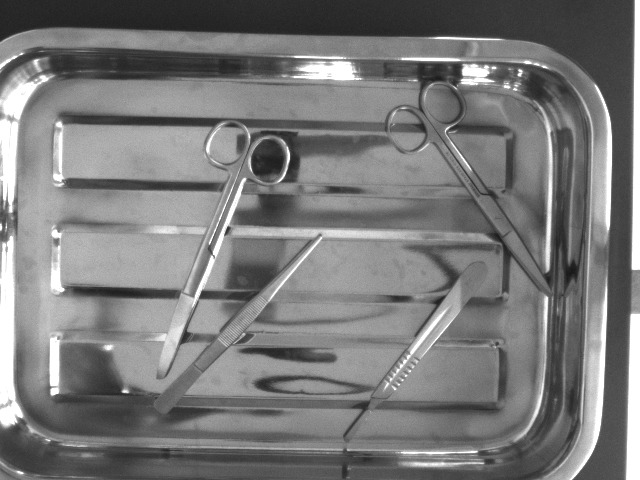

In [102]:
cv2_imshow(cv2.imread(image))

In [73]:
# 1 0.225391 0.677083 0.224219 0.443056
# 2 0.364453 0.388194 0.233594 0.484722
# 0 0.525781 0.303472 0.292188 0.306944
# 3 0.638281 0.608333 0.412500 0.244444
# separado71

In [74]:
category = [1, 0, 2, 3]
bbox = [[0.3730, 0.6764, 0.2680, 0.3806],
         [0.6477, 0.7319, 0.2297, 0.3806],
         [0.7336, 0.3910, 0.2625, 0.4542],
         [0.3480, 0.5188, 0.2133, 0.5431]]

In [75]:
# category = [1,2,0,3]
# bbox = [[0.225391,0.677083,0.224219,0.443056],[0.364453,0.388194,0.233594,0.484722],[0.525781,0.303472,0.292188,0.306944],[0.638281,0.608333,0.412500,0.244444]]

In [76]:
# input: category,bbox are list
# image is the location of original image
def plot(image, category, bbox):
  image1 = cv2.imread(image)
  w,h,c = image1.shape
  colors={0:(0,225,0),1:(225,0,0),2:(0,0,225),3:(0,225,225)}
  labelname = {0: 'Scalpel n4',1: 'Straight Dissection Clamp', 2:'Straight Mayo Scissor',3:'Curved Mayo Scissor'}
  for i in range(len(bbox)):
    label = labelname[category[i]]
    color = colors[category[i]]
    xc,yc = bbox[i][0],bbox[i][1]
    hp,wp = bbox[i][2],bbox[i][3]
    leftup = (int((xc-hp/2)*h),int((yc+wp/2)*w))
    rightdown = (int((xc+hp/2)*h),int((yc-wp/2)*w))
    # print(leftup,rightdown)
    Font = cv2.FONT_HERSHEY_SIMPLEX
    image1 = cv2.rectangle(image1,leftup,rightdown,color,2)
    cv2.putText(image1, label, leftup, Font, 0.7, color, 2)
  return image1

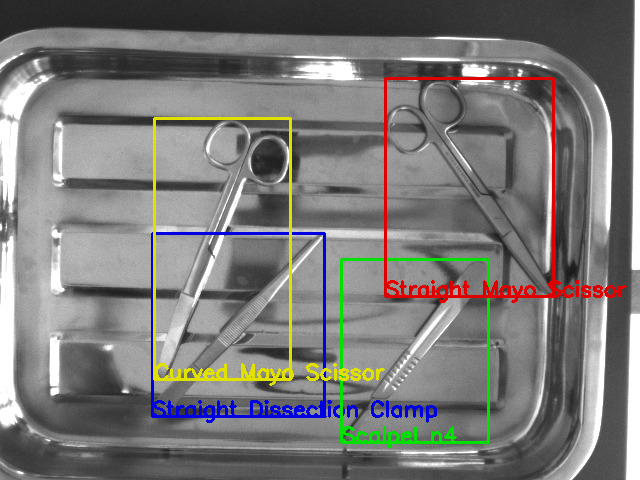

In [77]:
cv2_imshow(plot(image, category, bbox))

In [103]:
category = [0, 3, 2, 1]
bbox = [[341.9522, 258.5861, 489.4453, 440.1719],
          [155.1714, 119.4155, 292.5129, 379.2634],
          [387.3792,  78.9225, 552.2399, 299.8497],
          [155.5445, 232.8233, 325.0199, 414.8837]]
confidence = [0.9928, 0.9906, 0.9982, 0.9985]

In [112]:
# input: category,bbox are list
# image is the location of original image
def plot(image, category, bbox, confidence):
  image1 = cv2.imread(image)
  # w,h,c = image1.shape
  colors={0:(0,225,0),1:(225,0,0),2:(0,0,225),3:(0,225,225)}
  labelname = {0: 'Scalpel n4',1: 'Straight Dissection Clamp', 2:'Straight Mayo Scissor',3:'Curved Mayo Scissor'}
  for i in range(len(bbox)):
    label = labelname[category[i]]
    con = confidence[i]
    color = colors[category[i]]
    x1,y1 = int(bbox[i][0]),int(bbox[i][1])
    x2,y2 = int(bbox[i][2]),int(bbox[i][3])
    leftup = (x1,y1)
    rightdown = (x2,y2)
    mark = (x1,y1+20)
    # print(leftup,rightdown)
    Font = cv2.FONT_HERSHEY_SIMPLEX
    image1 = cv2.rectangle(image1,leftup,rightdown,color,2)
    cv2.putText(image1, label, leftup, Font, 0.7, color, 2)
    cv2.putText(image1, 'confidence: '+str(con), mark, Font, 0.65, color, 2)
  return image1

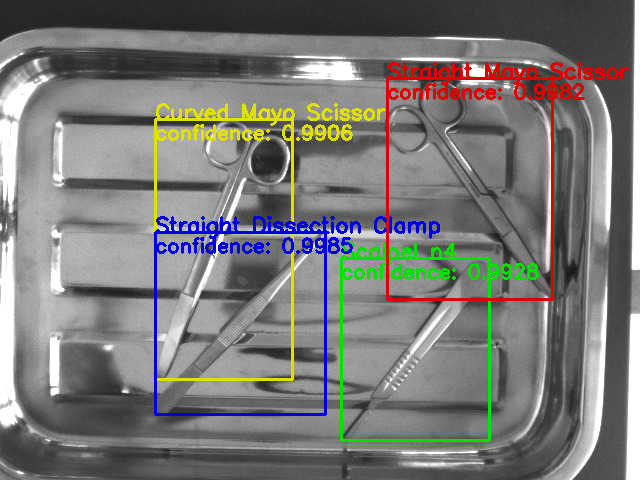

In [113]:
cv2_imshow(plot(image, category, bbox,confidence))